In [3]:
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.compat.v1 as tf
import keras
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from sklearn.preprocessing import PolynomialFeatures
#tf.disable_v2_behavior()

In [4]:
!pip3 install -U scikit-learn==0.24

     ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.4 MB 330.3 kB/s eta 0:00:23
     ---------------------------------------- 0.0/7.4 MB 330.3 kB/s eta 0:00:23
     ---------------------------------------- 0.0/7.4 MB 330.3 kB/s eta 0:00:23
     ---------------------------------------- 0.0/7.4 MB 330.3 kB/s eta 0:00:23
     ---------------------------------------- 0.0/7.4 MB 330.3 kB/s eta 0:00:23
     ---------------------------------------- 0.0/7.4 MB 330.3 kB/s eta 0:00:23
     ---------------------------------------- 0.0/7.4 MB 98.5 kB/s eta 0:01:15
     ---------------------------------------- 0.1/7.4 MB 136.5 kB/s eta 0:00:54
     ---------------------------------------- 0.1/7.4 MB 176.6 kB/s eta 0:00:42
     ---------------------------------------- 0.1/7.4 MB 180.8 kB/s eta 0:00:41
     ---------------------------------------- 0.1/7.4 MB 18

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [56 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "c:\Users\Hamza Iqbal\anaconda3\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "c:\Us

In [2]:
# path="G://My Drive\\Ai Training MetaPi\\Assignments_MetaPi\\Linear_Regression_using_ANN\\AirfoilSelfNoise.csv"

In [5]:
url = "G://My Drive\\Ai Training MetaPi\\Assignments_MetaPi\\Linear_Regression_using_ANN\\AirfoilSelfNoise.csv"
data = read_csv(url)
print(data)

         f  alpha       c  U_infinity     delta     SSPL
0      800    0.0  0.3048        71.3  0.002663  126.201
1     1000    0.0  0.3048        71.3  0.002663  125.201
2     1250    0.0  0.3048        71.3  0.002663  125.951
3     1600    0.0  0.3048        71.3  0.002663  127.591
4     2000    0.0  0.3048        71.3  0.002663  127.461
...    ...    ...     ...         ...       ...      ...
1498  2500   15.6  0.1016        39.6  0.052849  110.264
1499  3150   15.6  0.1016        39.6  0.052849  109.254
1500  4000   15.6  0.1016        39.6  0.052849  106.604
1501  5000   15.6  0.1016        39.6  0.052849  106.224
1502  6300   15.6  0.1016        39.6  0.052849  104.204

[1503 rows x 6 columns]


In [6]:
data = data.rename(columns={"f": 'Frequency',"alpha":'Angle of attack',"c":'Chord length',"U_infinity":'Free-stream velocity',"delta":"Section side displacement thickness","SSPL":"Scaled Sound Pressure Level"})
print(data)

      Frequency  Angle of attack  Chord length  Free-stream velocity  \
0           800              0.0        0.3048                  71.3   
1          1000              0.0        0.3048                  71.3   
2          1250              0.0        0.3048                  71.3   
3          1600              0.0        0.3048                  71.3   
4          2000              0.0        0.3048                  71.3   
...         ...              ...           ...                   ...   
1498       2500             15.6        0.1016                  39.6   
1499       3150             15.6        0.1016                  39.6   
1500       4000             15.6        0.1016                  39.6   
1501       5000             15.6        0.1016                  39.6   
1502       6300             15.6        0.1016                  39.6   

      Section side displacement thickness  Scaled Sound Pressure Level  
0                                0.002663                     

In [7]:
data.describe()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Section side displacement thickness,Scaled Sound Pressure Level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


C:\Users\Hamza Iqbal\AppData\Local\Temp\ipykernel_14672\2947515455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data['Frequency'], hist=False)


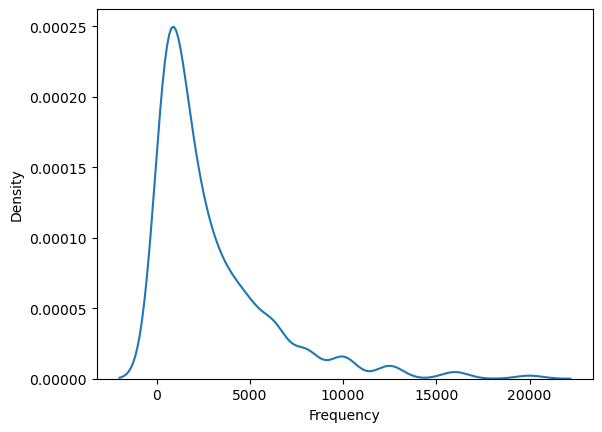

C:\Users\Hamza Iqbal\AppData\Local\Temp\ipykernel_14672\2947515455.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data['Angle of attack'], hist=False)


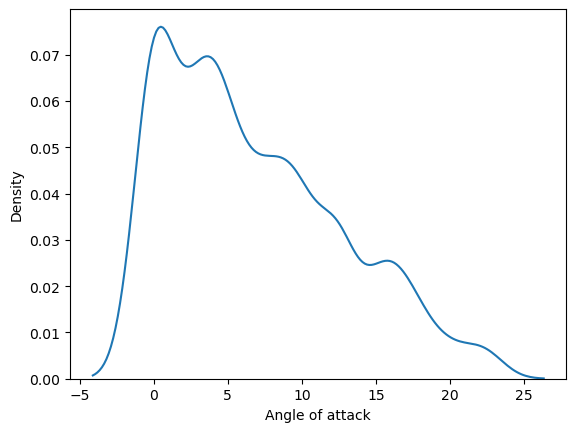

C:\Users\Hamza Iqbal\AppData\Local\Temp\ipykernel_14672\2947515455.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data['Chord length'], hist=False)


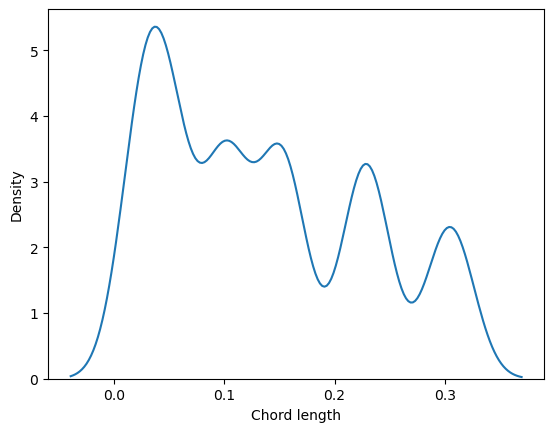

C:\Users\Hamza Iqbal\AppData\Local\Temp\ipykernel_14672\2947515455.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data['Free-stream velocity'], hist=False)


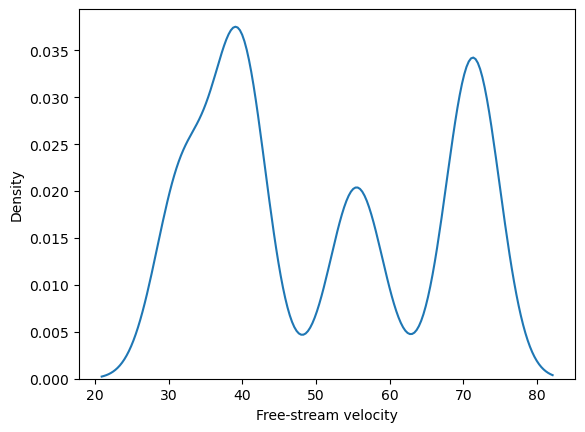

C:\Users\Hamza Iqbal\AppData\Local\Temp\ipykernel_14672\2947515455.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data['Section side displacement thickness'], hist=False)


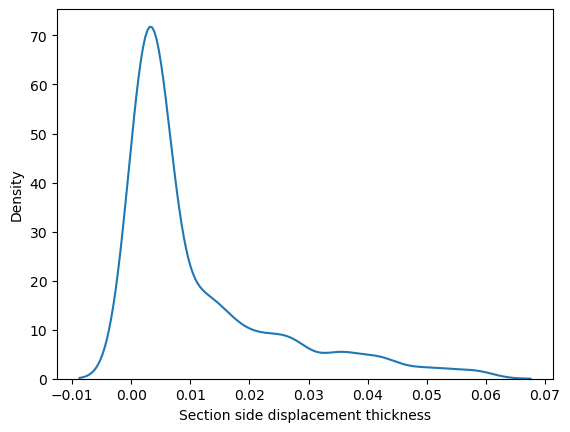

C:\Users\Hamza Iqbal\AppData\Local\Temp\ipykernel_14672\2947515455.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data['Scaled Sound Pressure Level'], hist=False)


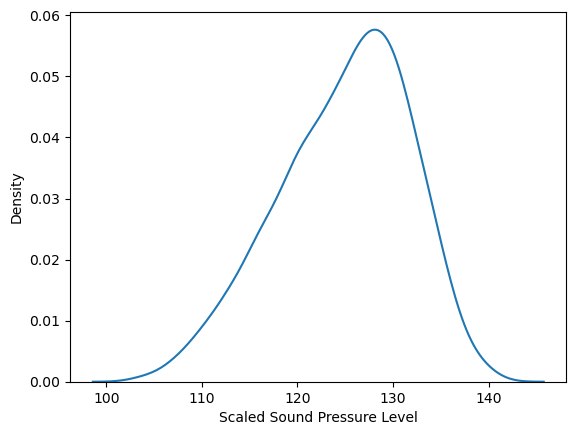

In [8]:
sns.distplot(a=data['Frequency'], hist=False)
plt.show()
sns.distplot(a=data['Angle of attack'], hist=False)
plt.show()
sns.distplot(a=data['Chord length'], hist=False)
plt.show()
sns.distplot(a=data['Free-stream velocity'], hist=False)
plt.show()
sns.distplot(a=data['Section side displacement thickness'], hist=False)
plt.show()
sns.distplot(a=data['Scaled Sound Pressure Level'], hist=False)
plt.show()

Text(0, 0.5, 'Section side displacement thickness')

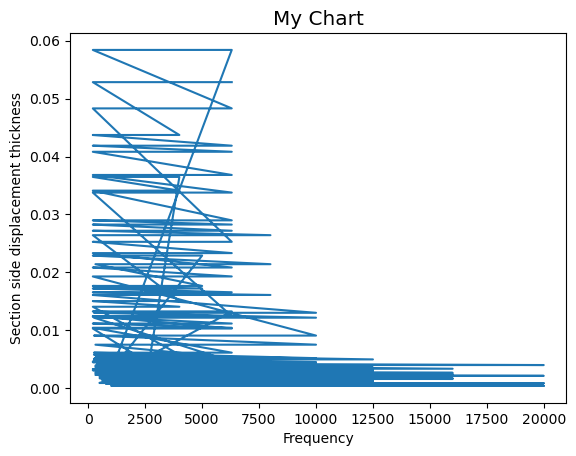

In [9]:
fig,ax= plt.subplots()
plt.style.use('ggplot')
ax.plot(data["Frequency"],data["Section side displacement thickness"])
ax.set_title('My Chart')
ax.set_xlabel('Frequency')
ax.set_ylabel('Section side displacement thickness')

Text(0, 0.5, 'Section side displacement thickness')

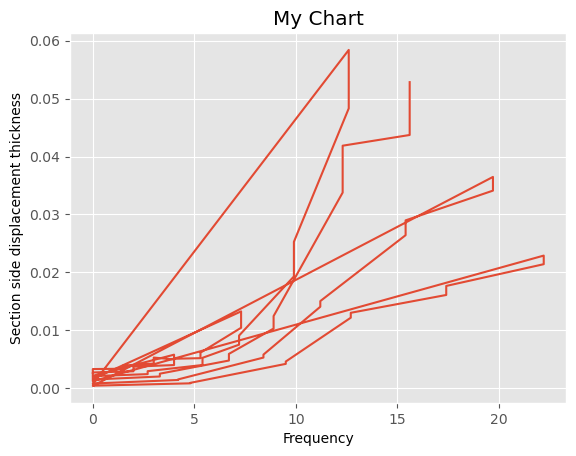

In [10]:
fig,ax= plt.subplots()
plt.style.use('ggplot')
ax.plot(data["Angle of attack"],data["Section side displacement thickness"])
ax.set_title('My Chart')
ax.set_xlabel('Frequency')
ax.set_ylabel("Section side displacement thickness")

In [12]:
def plotRel(ldf):
    sns.set(style='whitegrid')
    g = sns.relplot(x='Frequency',y='Scaled Sound Pressure Level',col='velocity',row='Chord length',data=ldf,kind='line',legend='full',hue='Angle of attack',palette='jet_r',height=4)

In [13]:
data = data.rename(columns={"Frequency": 'Frequency',"Angle of attack":'Angle of attack',"Chord length":'Chord length',"Free-stream velocity":'velocity',"Section side displacement thickness":"Section side displacement thickness","Scaled Sound Pressure Level":"Scaled Sound Pressure Level"})
print(data)

''' Create Data Subsets for different airfoil sizes '''
sns.set(style='whitegrid')
pdlst_lchord = [] # list of pd subset data storing all unique 'l_chord'
lst_lchord_unique = data['Chord length'].unique().tolist()
lst_lchord_unique.sort() # get unique 'l_chord'&sort()
for i in lst_lchord_unique:
    ldf = data[data['Chord length']==i].copy()
    pdlst_lchord.append(ldf)    # add all unique subsets to list

      Frequency  Angle of attack  Chord length  velocity  \
0           800              0.0        0.3048      71.3   
1          1000              0.0        0.3048      71.3   
2          1250              0.0        0.3048      71.3   
3          1600              0.0        0.3048      71.3   
4          2000              0.0        0.3048      71.3   
...         ...              ...           ...       ...   
1498       2500             15.6        0.1016      39.6   
1499       3150             15.6        0.1016      39.6   
1500       4000             15.6        0.1016      39.6   
1501       5000             15.6        0.1016      39.6   
1502       6300             15.6        0.1016      39.6   

      Section side displacement thickness  Scaled Sound Pressure Level  
0                                0.002663                      126.201  
1                                0.002663                      125.201  
2                                0.002663                   

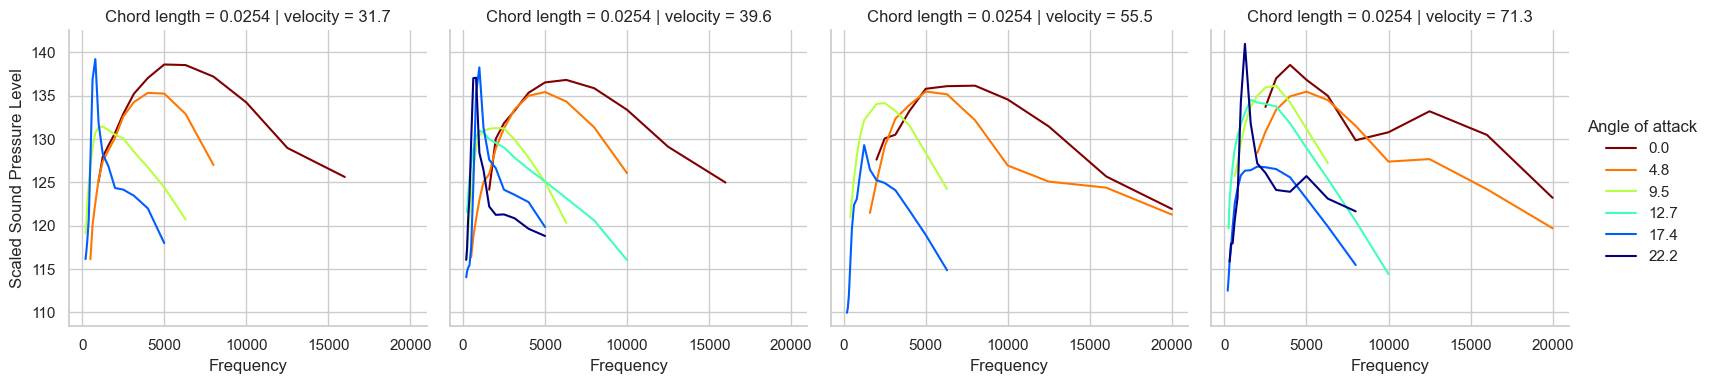

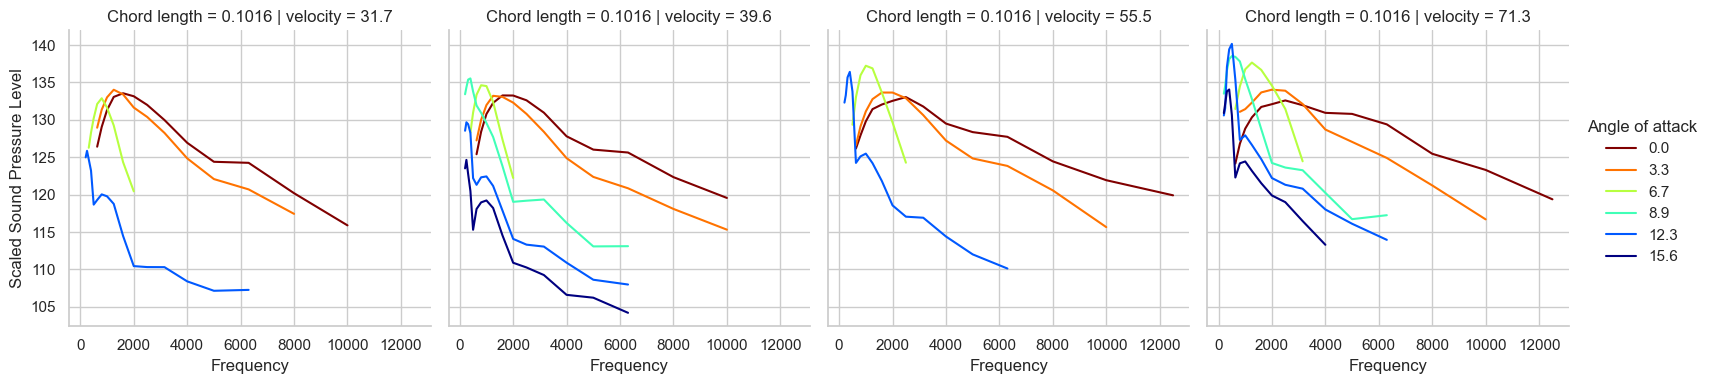

In [14]:
plotRel(pdlst_lchord[0])
plotRel(pdlst_lchord[2])

In [15]:
sns.set(style='whitegrid')
lst = [0,2]
def relplot1(id):
    for i in id:
        g = sns.relplot(x='Scaled Sound Pressure Level',y='Section side displacement thickness',col='velocity',row='Chord length',
                    hue='Angle of attack',sizes='Scaled Sound Pressure Level',palette='jet_r',
                    kind='scatter',legend='full',data=pdlst_lchord[i])
        g.fig.set_size_inches(16,3)
        leg = g._legend
        leg.set_bbox_to_anchor([1.06,1])  # coordinates of lower left of bounding box
        leg._loc = 1  # if required you can set the loc

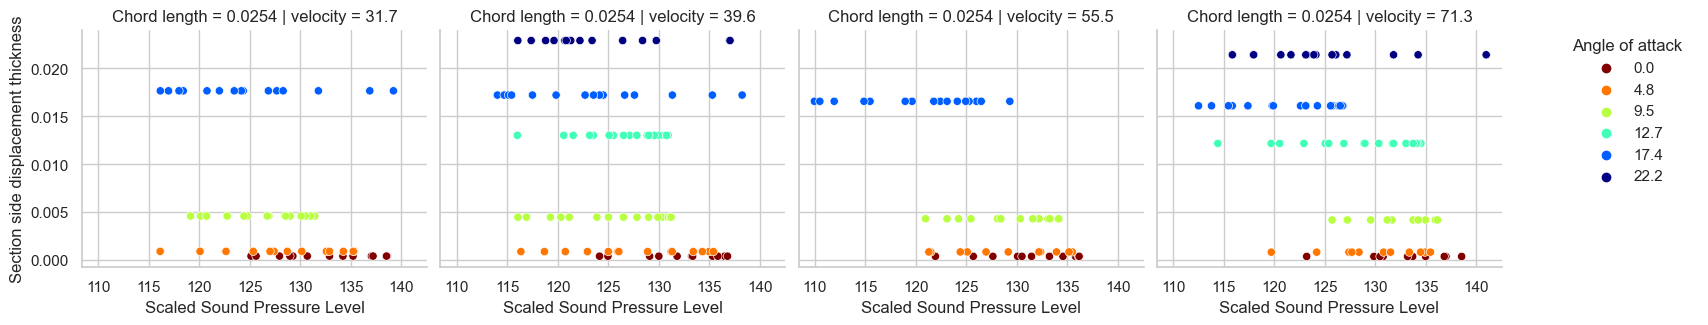

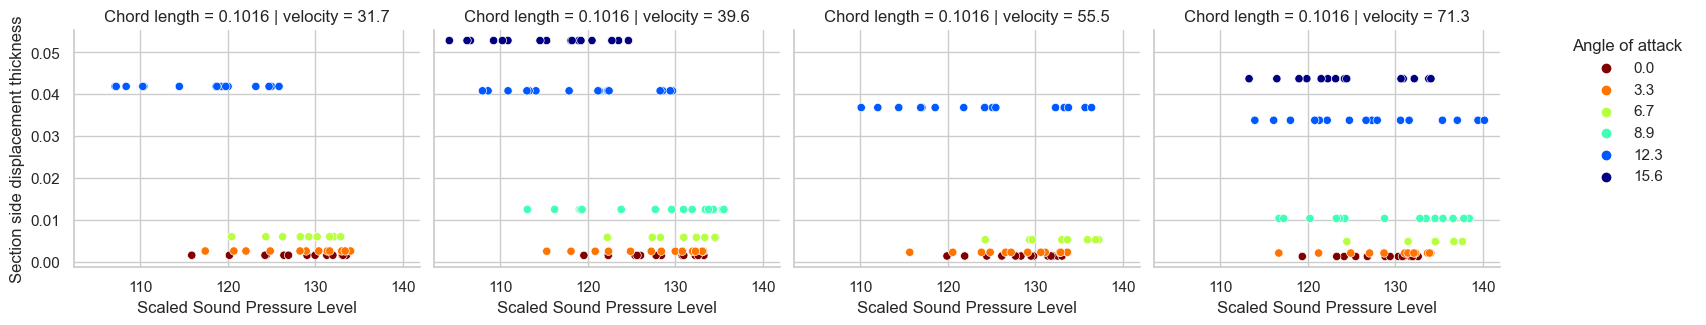

In [16]:
relplot1(lst)

In [17]:
print(data.corr())

                                     Frequency  Angle of attack  Chord length  \
Frequency                             1.000000        -0.272765     -0.003661   
Angle of attack                      -0.272765         1.000000     -0.504868   
Chord length                         -0.003661        -0.504868      1.000000   
velocity                              0.133664         0.058760      0.003787   
Section side displacement thickness  -0.230107         0.753394     -0.220842   
Scaled Sound Pressure Level          -0.390711        -0.156108     -0.236162   

                                     velocity  \
Frequency                            0.133664   
Angle of attack                      0.058760   
Chord length                         0.003787   
velocity                             1.000000   
Section side displacement thickness -0.003974   
Scaled Sound Pressure Level          0.125103   

                                     Section side displacement thickness  \
Frequency   

In [18]:
x_org = np.array(data[["Frequency","Chord length","velocity","Angle of attack","Section side displacement thickness"]])
y_org = np.array(data[["Scaled Sound Pressure Level"]])
x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(x_org, y_org,train_size=0.85)
scaler = StandardScaler()
# transform original data
x_train_org = scaler.fit_transform(x_train_org)
x_test_org = scaler.fit_transform(x_test_org)

In [19]:
pca = PCA(n_components=1)
pca.fit(np.array(data[["Angle of attack","Section side displacement thickness"]]))
print("variance explained : ",pca.explained_variance_ratio_)

y = pca.transform(np.array(data[["Angle of attack","Section side displacement thickness"]]))
new_component = pd.DataFrame(y)
new_component = new_component.rename(columns={0: 'New component'})
data["New component"] = new_component
del data["Angle of attack"]
del data["Section side displacement thickness"]

variance explained :  [0.99999787]


In [20]:
print(data.corr())

                             Frequency  Chord length  velocity  \
Frequency                     1.000000     -0.003661  0.133664   
Chord length                 -0.003661      1.000000  0.003787   
velocity                      0.133664      0.003787  1.000000   
Scaled Sound Pressure Level  -0.390711     -0.236162  0.125103   
New component                -0.272765     -0.504868  0.058759   

                             Scaled Sound Pressure Level  New component  
Frequency                                      -0.390711      -0.272765  
Chord length                                   -0.236162      -0.504868  
velocity                                        0.125103       0.058759  
Scaled Sound Pressure Level                     1.000000      -0.156108  
New component                                  -0.156108       1.000000  


In [21]:
x = np.array(data[["Frequency","Chord length","velocity","New component"]])
y = np.array(data[["Scaled Sound Pressure Level"]])
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.85)
scaler = StandardScaler()
# transform  data
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(4,)))
model.add(tf.keras.layers.Dense(units=300,activation="sigmoid"))
model.add(tf.keras.layers.Dense(units=300,activation="sigmoid"))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               1500      
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 1)                 301       
                                                                 
Total params: 92,101
Trainable params: 92,101
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 1s 788ms/step - loss: 46.9697 - mean_absolute_percentage_error: 4.5383 - val_loss: 50.9181 - val_mean_absolute_percentage_error: 4.8054
Epoch 2/200
1/1 [==============================] - 0s 80ms/step - loss: 46.9662 - mean_absolute_percentage_error: 4.5381 - val_loss: 50.9145 - val_mean_absolute_percentage_error: 4.8053
Epoch 3/200
1/1 [==============================] - 0s 82ms/step - loss: 46.9628 - mean_absolute_percentage_error: 4.5379 - val_loss: 50.9110 - val_mean_absolute_percentage_error: 4.8051
Epoch 4/200
1/1 [==============================] - 0s 75ms/step - loss: 46.9594 - mean_absolute_percentage_error: 4.5378 - val_loss: 50.9074 - val_mean_absolute_percentage_error: 4.8049
Epoch 5/200
1/1 [==============================] - 0s 75ms/step - loss: 46.9560 - mean_absolute_percentage_error: 4.5376 - val_loss: 50.9038 - val_mean_absolute_percentage_error: 4.8047
Epoch 6/200
1/1 [==============================] - 0s 74ms/step - los

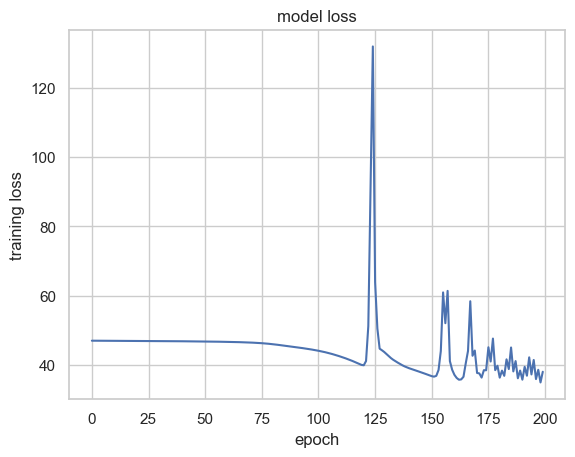

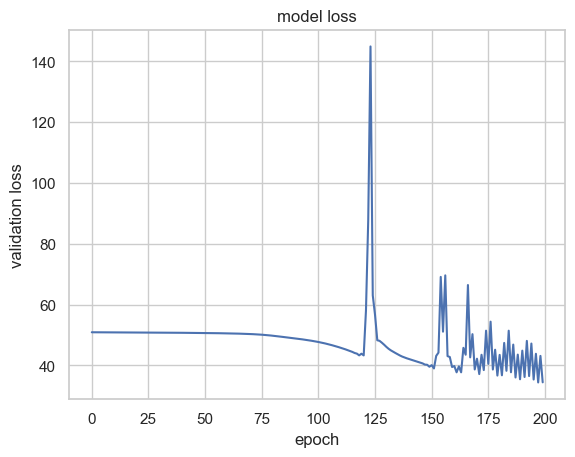

In [24]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss="mean_squared_error",metrics=["mean_absolute_percentage_error"])
history = model.fit(x_train, y_train,batch_size=1277,epochs=200,steps_per_epoch=1,validation_data=(x_test, y_test))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('training loss')
plt.xlabel('epoch')
plt.show()
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.show()

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(5,)))
model.add(tf.keras.layers.Dense(units=3,activation="sigmoid"))
model.add(tf.keras.layers.Dense(units=4,activation="sigmoid"))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
 dense_4 (Dense)             (None, 4)                 16        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 15671.4346 - mean_absolute_percentage_error: 100.0676 - val_loss: 14204.3076 - val_mean_absolute_percentage_error: 95.6211
Epoch 2/150
1/1 [==============================] - 0s 80ms/step - loss: 14322.3193 - mean_absolute_percentage_error: 95.6388 - val_loss: 12350.6514 - val_mean_absolute_percentage_error: 89.1237
Epoch 3/150
1/1 [==============================] - 0s 73ms/step - loss: 12460.8320 - mean_absolute_percentage_error: 89.1700 - val_loss: 10135.7539 - val_mean_absolute_percentage_error: 80.6722
Epoch 4/150
1/1 [==============================] - 0s 70ms/step - loss: 10235.4902 - mean_absolute_percentage_error: 80.7547 - val_loss: 8222.9111 - val_mean_absolute_percentage_error: 72.5869
Epoch 5/150
1/1 [==============================] - 0s 73ms/step - loss: 8312.4844 - mean_absolute_percentage_error: 72.7030 - val_loss: 6664.3237 - val_mean_absolute_percentage_error: 65.2670
Epoch 6/150
1/1 [=================

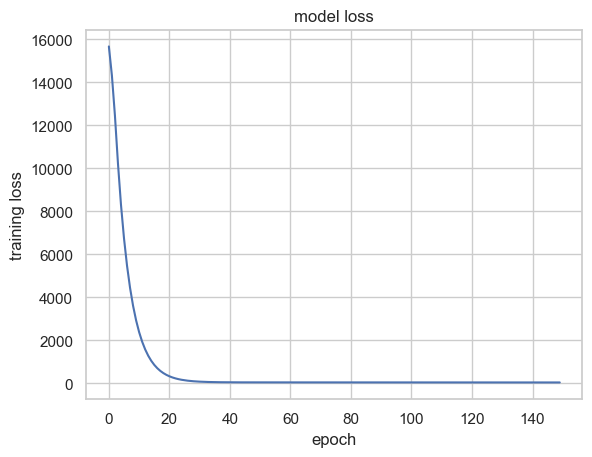

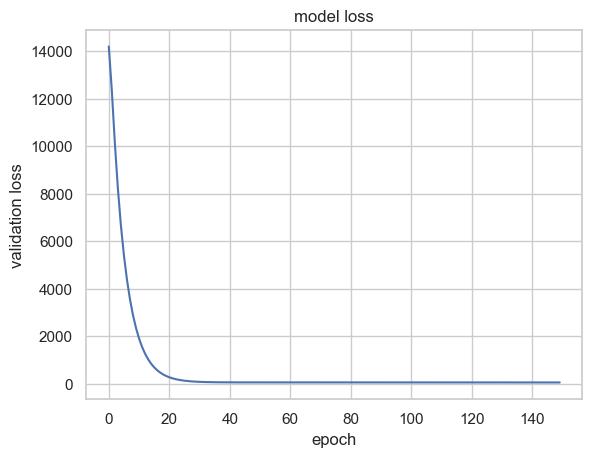

In [26]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss="mean_squared_error",metrics=["mean_absolute_percentage_error"])
history = model.fit(x_train_org, y_train_org,batch_size=1277,epochs=150,steps_per_epoch=1,validation_data=(x_test_org, y_test_org))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('training loss')
plt.xlabel('epoch')
plt.show()
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.show()

In [27]:
ANN_predictions = model.predict(x_test_org)

8/8 [==============================] - 0s 4ms/step


In [28]:
print(ANN_predictions)

[[124.98347 ]
 [125.0724  ]
 [124.92445 ]
 [124.85301 ]
 [125.04364 ]
 [121.82044 ]
 [125.07958 ]
 [125.05355 ]
 [125.06905 ]
 [125.04318 ]
 [125.05313 ]
 [124.990776]
 [125.03527 ]
 [125.06924 ]
 [124.728714]
 [124.83638 ]
 [125.031555]
 [124.56432 ]
 [124.83107 ]
 [125.06545 ]
 [125.01436 ]
 [125.08083 ]
 [125.06094 ]
 [125.03596 ]
 [125.0218  ]
 [125.02875 ]
 [122.98022 ]
 [125.015335]
 [124.472145]
 [123.946266]
 [124.24274 ]
 [124.76588 ]
 [124.942894]
 [125.0351  ]
 [124.70536 ]
 [124.661255]
 [124.98444 ]
 [125.05343 ]
 [124.12159 ]
 [124.978455]
 [124.76965 ]
 [125.07327 ]
 [125.07189 ]
 [123.88629 ]
 [125.003746]
 [125.06445 ]
 [125.011665]
 [125.05639 ]
 [125.0575  ]
 [125.04316 ]
 [125.0636  ]
 [125.048195]
 [125.07311 ]
 [122.935555]
 [125.04463 ]
 [124.83756 ]
 [124.928276]
 [125.07662 ]
 [125.07432 ]
 [125.05618 ]
 [125.04662 ]
 [125.02578 ]
 [125.05602 ]
 [123.05366 ]
 [124.66322 ]
 [124.98515 ]
 [125.06662 ]
 [124.91905 ]
 [125.01915 ]
 [125.07465 ]
 [124.5532  ]
 [124.

In [29]:
def MeanAbsolutePercentageError(y_true,y_predicted):
    S = 0
    for i in range(0,len(y_true[0])):
        S = S + abs((y_true[i] - y_predicted[i])/y_true[i])
    return 100*S/len(y_true[0])

In [30]:
LR = LinearRegression()
LR.fit(x_train_org,y_train_org)
y_prediction_LR =  LR.predict(x_test_org)
metric = MeanAbsolutePercentageError(y_test_org,y_prediction_LR)
print("Mean absolute percentage error :")
print(metric[0])
print("R square :")
R_square =  LR.score(x_test_org,y_test_org)
print(R_square)

Mean absolute percentage error :
5.269731230524697
R square :
0.5943463709232799
